<a href="https://colab.research.google.com/github/SankeerthShabad/IDS/blob/main/problem1_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
#Importing csv file as Adult_trainingDF

library(readr)
Adult_trainingDF <- read_csv("https://raw.githubusercontent.com/SankeerthShabad/IDS/main/HW4/adult_training.csv")
Adult_trainingDF

Rows: 14797 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (5): workclass, maritalstatus, occupation, sex, income
dbl (4): age, education, capitalgain, capitalloss

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,workclass,education,maritalstatus,occupation,sex,capitalgain,capitalloss,income
<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Male,0,0,<=50K
38,Private,9,Divorced,Handlers-cleaners,Male,0,0,<=50K
49,Private,5,Married-spouse-absent,Other-service,Female,0,0,<=50K
52,Self-emp-not-inc,9,Married-civ-spouse,Exec-managerial,Male,0,0,>50K
31,Private,14,Never-married,Prof-specialty,Female,14084,0,>50K
40,Private,11,Married-civ-spouse,Craft-repair,Male,0,0,>50K
38,Private,7,Married-civ-spouse,Sales,Male,0,0,<=50K
43,Private,7,Married-civ-spouse,Transport-moving,Male,0,2042,<=50K
54,?,10,Married-civ-spouse,?,Male,0,0,>50K


### The csv file was imported as a dataframe named Adult trainingDF, and there are 14797 rows and 9 columns in the dataframe.



###The following syntax is used to check for any null values in the Adult trainingDF.

In [70]:
#Checking for null values in Adult_trainingDF

sum(is.na(Adult_trainingDF))

[1] 0

### We can also observe that there are no null values in Adult trainingDF.

## The value counts() method is tested using the syntax shown below.

In [71]:
#table of workclass
table(Adult_trainingDF$workclass)


               ?      Federal-gov        Local-gov     Never-worked 
             829              454              969                5 
         Private     Self-emp-inc Self-emp-not-inc        State-gov 
           10281              498             1170              586 
     Without-pay 
               5 

### Because there is an undefined workclass '?', we must replace that undefined value with the most common workclass.


## Undefined workclasses are being replaced with the most prevalent workclasses.

In [72]:
# replacing undefined workclass
Adult_trainingDF[Adult_trainingDF=='?']<-'Private'
table(Adult_trainingDF$workclass)


     Federal-gov        Local-gov     Never-worked          Private 
             454              969                5            11110 
    Self-emp-inc Self-emp-not-inc        State-gov      Without-pay 
             498             1170              586                5 

### After converting an undefined work class to a Private, we can observe that the range of Private work class has increased.

# **Contingency Tables**


*  A contingency table is a tabular representation of categorical data.
*  A contingency table usually shows frequencies for particular combinations of values of two discrete random variable s X and Y.




In [73]:
# Cross tabulation of workclass and sex

sex_workclass_crosstab <- table(Adult_trainingDF$sex, Adult_trainingDF$workclass)
ftable(sex_workclass_crosstab)

        Federal-gov Local-gov Never-worked Private Self-emp-inc Self-emp-not-inc State-gov Without-pay
                                                                                                      
Female          149       377            1    3951           54              178       201           1
Male            305       592            4    7159          444              992       385           4

### We discovered that the number of males and females working in various job classes after completing cross tabulation for workclass and sex. We can observe from the crosstabulation above that the private workclass has a greater percentage of working persons. Without-pay and Never-worked workers make up the smallest percentage of the workforce.

## Barplot for workclass and sex

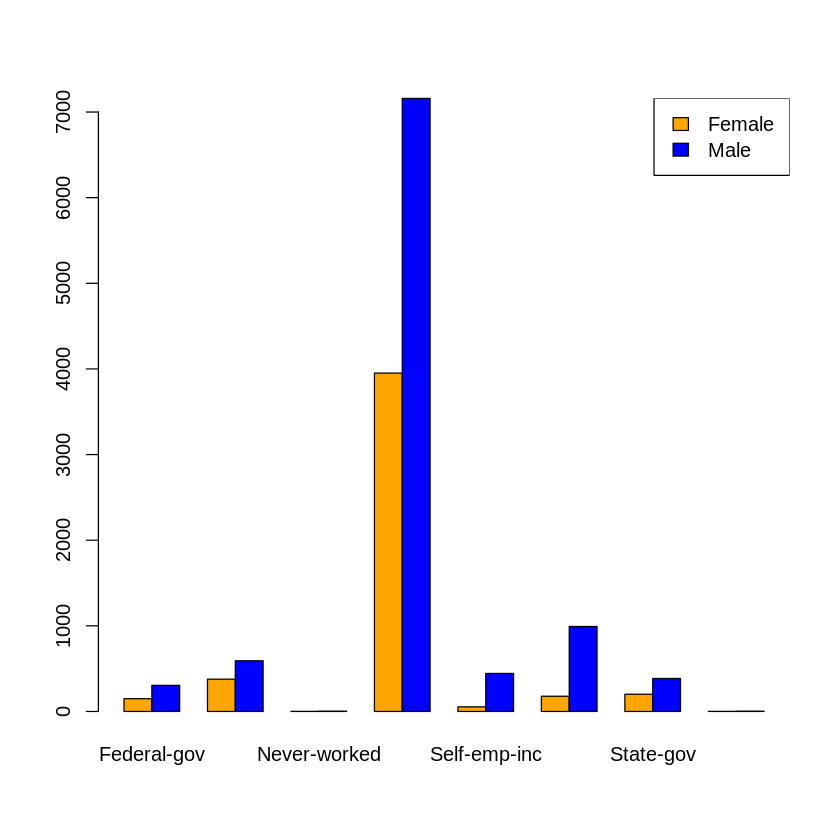

In [74]:
# Creating barplot for work class and sex

colors <- c("orange", "blue")
barplot(sex_workclass_crosstab, col = colors, beside = TRUE)
legend("topright", legend = c("Female", "Male"), fill = colors)

### The barplot diagram for workclass and sex is seen in the diagram above. Workclass values are on the x axis, while the range of male and female work under each job class is on the y axis.

## Contengency table for marital status and sex

In [75]:
# Cross tabulation of sex and maritalstatus

sex_marital_crosstab <- table(Adult_trainingDF$sex, Adult_trainingDF$maritalstatus)
ftable(sex_marital_crosstab)

        Divorced Married-AF-spouse Married-civ-spouse Married-spouse-absent Never-married Separated Widowed
                                                                                                           
Female      1219                 7                761                    95          2160       290     380
Male         795                 4               6010                   104          2717       182      73

### Marital status and sex are compared in a cross-tabulation. This crosstab displays the entire male and female population by marital status. Females have the largest number of married-civ-spouses, whereas males have the highest number of married-civ-spouses.

## Barplot for sex and marital status

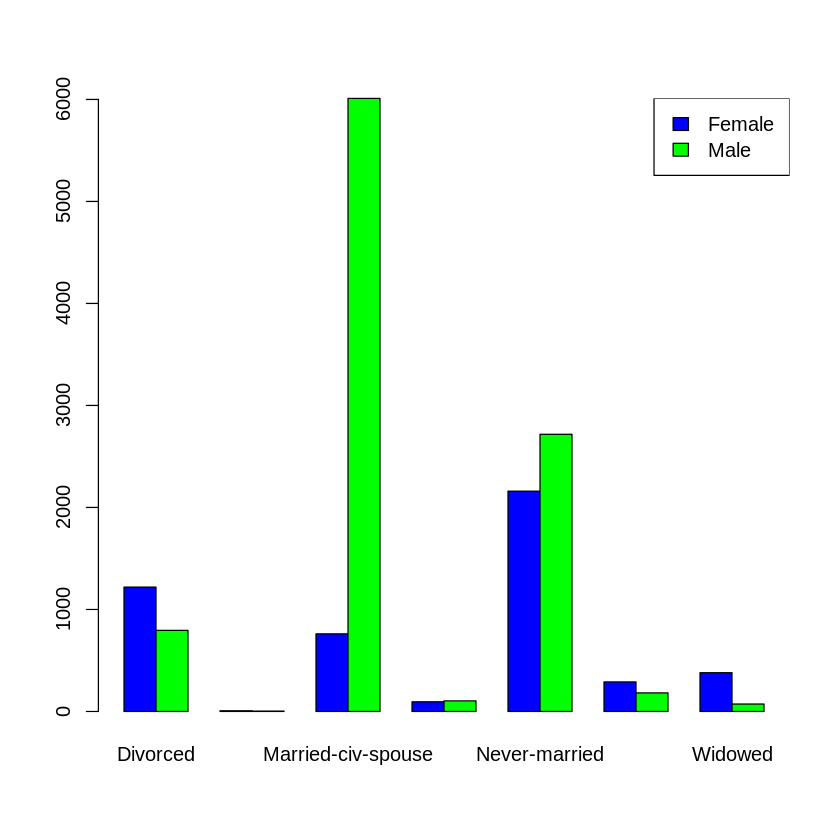

In [76]:
# creating barplot for sex and maritalstatus

colors <- c("blue", "green")
barplot(sex_marital_crosstab, col = colors, beside = TRUE)
legend("topright", legend = c("Female", "Male"), fill = colors)

### For marital status and sex, a barplot diagram is used. Male and female values are on the x axis, while the range of male and female marital status is on the y axis. Married-civ-spouse has the highest marital status, while Married-AF-spouse has the lowest.

## Creating new data frame

In [77]:
#creating dataframe for adultover40DF

adultabove40DF<- subset(Adult_trainingDF,age>40)
adultabove40DF

age,workclass,education,maritalstatus,occupation,sex,capitalgain,capitalloss,income
<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Male,0,0,<=50K
49,Private,5,Married-spouse-absent,Other-service,Female,0,0,<=50K
52,Self-emp-not-inc,9,Married-civ-spouse,Exec-managerial,Male,0,0,>50K
43,Private,7,Married-civ-spouse,Transport-moving,Male,0,2042,<=50K
54,Private,10,Married-civ-spouse,Private,Male,0,0,>50K
44,Private,14,Divorced,Exec-managerial,Female,0,0,<=50K
50,Federal-gov,13,Divorced,Exec-managerial,Male,0,0,>50K
47,Self-emp-inc,9,Divorced,Exec-managerial,Male,0,0,<=50K
43,Private,10,Married-civ-spouse,Tech-support,Male,0,0,>50K


### For persons over the age of 40, a dataframe called 'Adultabove40' was created.

## Contengency table for marital status and sex

In [78]:
# Creating contingency table for age above 40

above40_crosstab <- table(adultabove40DF$sex, adultabove40DF$maritalstatus)
ftable(above40_crosstab)

        Divorced Married-civ-spouse Married-spouse-absent Never-married Separated Widowed
                                                                                         
Female       720                305                    38           256       133     354
Male         448               3383                    47           315        74      71

### Adultabove40DF contingency table Females are more likely to be divorced, whereas males are more likely to be married-civil-spouse.

## Barplot for sex and marital status

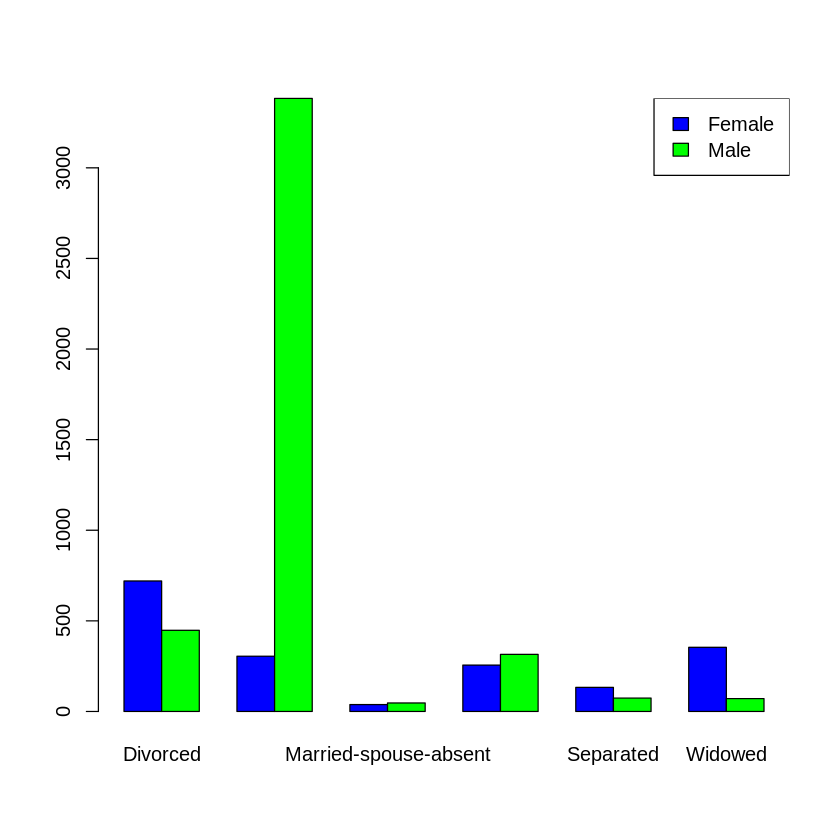

In [79]:
# Creating barplot fro adult over 40

colors <- c("blue", "green")
barplot(above40_crosstab, col = colors, beside = TRUE)
legend("topright", legend = c("Female", "Male"), fill = colors)

### Adultover40's barplot. Males over 40 have a greater range in Married-civ-spouse in marital status, while female divorced have a higher range in marital status, as seen in the graph above.

# Detecting Outliers for education

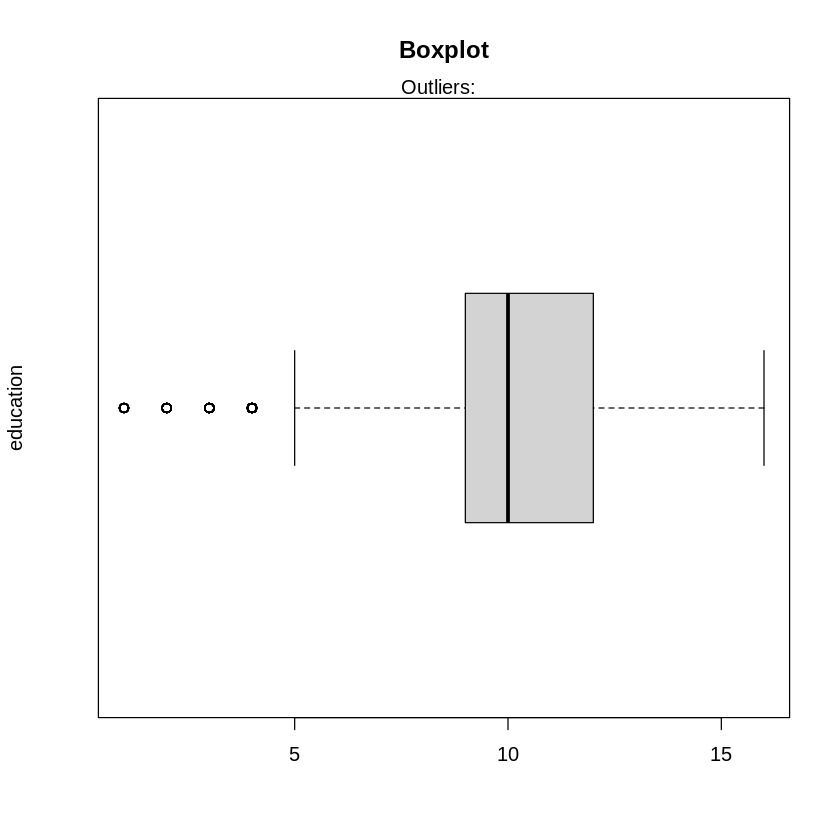

In [80]:
#checking for outliers in education.

boxplot(Adult_trainingDF$education,ylab = "education",main = "Boxplot",horizontal = TRUE)
mtext(paste("Outliers: ", paste(collapse = ", ")))

Outliers from 4 are plainly seen in the graph above.

In [81]:
#Prining index of outliers of education.

outlier_education<- which(Adult_trainingDF$education < 4)
outlier_education

[1]    73   102   200   235   244   285   354   438   542   628   821   878
 [13]   997  1124  1183  1196  1223  1224  1286  1309  1319  1322  1351  1397
 [25]  1479  1497  1518  1570  1588  1684  1784  1808  1881  1984  2287  2296
 [37]  2300  2373  2466  2524  2539  2579  2588  2627  2641  2686  2703  2747
 [49]  2758  2979  3274  3373  3572  3648  3733  3742  3818  3838  3925  4043
 [61]  4080  4081  4126  4129  4137  4189  4241  4257  4302  4319  4391  4416
 [73]  4489  4591  4661  4722  4762  4805  4812  4887  4926  5001  5020  5106
 [85]  5179  5241  5263  5337  5379  5432  5445  5457  5532  5541  5595  5678
 [97]  5703  5762  5842  5962  5989  6003  6009  6049  6103  6226  6259  6273
[109]  6392  6448  6461  6515  6555  6612  6660  6785  6799  6844  6849  6911
[121]  6948  6992  7003  7091  7096  7106  7227  7339  7354  7465  7509  7565
[133]  7681  7784  7816  7926  7942  7945  8072  8081  8132  8196  8373  8395
[145]  8467  8515  8543  8577  8682  8741  8766  8773  8881  8964  8970  8975
[157]  9165  9182  9359  9370  9512  9550  9563  9681  9684  9717  9775  9804
[169]  9875  9906  9950  9966  9975  9976 10007 10093 10132 10212 10215 10317
[181] 10454 10471 10512 10546 10547 10599 10652 10818 10877 10941 11068 11092
[193] 11482 11485 11511 11532 11578 11655 11803 11947 11982 12077 12183 12198
[205] 12224 12253 12265 12343 12358 12399 12488 12490 12499 12543 12560 12616
[217] 12620 12632 12645 12683 12735 12745 12746 12765 12797 12836 12838 12870
[229] 12956 12966 12998 13002 13005 13007 13065 13068 13084 13366 13371 13374
[241] 13383 13447 13456 13512 13553 13564 13747 13764 13783 13825 13837 13853
[253] 14012 14016 14017 14098 14117 14142 14186 14253 14255 14319 14331 14476
[265] 14552 14625 14691 14725 14728

Outliers indexing numbers where education<3.

In [82]:
#outlier of education

Adult_trainingDF[outlier_education, "education"]

education
<dbl>
2
1
2
3
2
3
3
2
2


## summary() method 

In [83]:
# summary of Adult_training $education
summary(Adult_trainingDF$education)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00    9.00   10.00   10.07   12.00   16.00 

### summary() returns the count, mean, standard deviation, min, quartiles, and maximum values for the specified dataframe.

## Identifying lower and upper limit outliers

In [84]:
# finding upper and lower bound of age
q1 <- quantile(Adult_trainingDF$education,0.25)
q3 <- quantile(Adult_trainingDF$education,0.75)
iqr <- q3-q1
edu_lower_bound <- Adult_trainingDF$education[Adult_trainingDF$education<(q1-(1.5 * iqr))]
edu_upper_bound <- Adult_trainingDF$education[Adult_trainingDF$education>(q3+(1.5 * iqr))]

In [85]:
edu_lower_bound

[1] 2 4 1 2 3 2 4 3 4 4 3 4 2 4 2 3 4 4 4 4 3 4 4 2 4 4 3 4 4 4 4 3 4 2 3 4 3
 [38] 2 3 2 4 3 1 1 3 4 3 4 4 2 3 4 3 1 4 4 4 4 3 4 4 3 2 4 1 2 4 4 4 3 3 3 4 4
 [75] 4 4 3 4 4 4 4 3 2 3 4 3 3 3 2 2 2 2 3 4 4 4 1 4 4 4 4 4 4 4 4 1 4 2 4 4 4
[112] 2 4 4 4 1 4 4 4 4 1 1 4 3 2 4 4 2 4 4 1 4 4 3 2 3 3 2 3 4 3 3 4 3 4 3 3 4
[149] 3 3 4 2 4 3 4 3 4 3 3 3 4 4 3 3 4 4 3 3 4 4 4 4 1 4 2 4 3 4 3 4 4 4 3 1 2
[186] 3 3 4 4 4 2 3 4 3 4 4 4 4 2 4 3 2 2 4 4 4 3 4 4 4 2 4 3 3 4 3 2 4 4 4 2 2
[223] 3 4 4 4 3 3 3 4 4 4 2 4 2 3 4 3 4 2 4 4 4 3 2 3 4 2 2 3 3 3 3 2 4 2 4 4 4
[260] 4 4 2 2 4 4 4 4 3 2 4 4 1 4 4 4 3 4 4 4 2 3 4 4 4 3 2 3 4 4 4 4 3 3 4 3 4
[297] 4 3 4 4 3 2 4 4 3 3 4 3 3 4 4 2 4 2 4 3 2 2 2 2 3 4 4 3 2 4 4 4 4 4 4 3 4
[334] 3 4 3 4 3 3 4 4 2 3 4 4 4 3 4 4 3 4 1 4 4 4 3 2 1 3 1 3 4 3 4 3 1 4 3 3 4
[371] 4 2 4 4 3 3 3 4 3 3 4 3 4 4 4 3 4 4 4 3 4 4 4 3 4 3 4 4 1 2 4 4 4 4 4 4 4
[408] 4 1 4 1 4 4 3 1 4 4 3 4 3 4 4 4 4 4 3 4 4 4 4 2 4 3 4 4 1 4 4 3 2 3 2 3 4
[445] 4 2 3 2 4 3 3 3 4 4 3 3 4 4 3 3 3 3 4 2 4 3 3 2 4 2 4 2 4 2 3 3 4 3 4 2 4
[482] 3 2 3 3 3 3 4 2 4 4 4 4 4 4 4 4 4 3 2 2 2 4 4 3 2 4 2 2 2 4 4 3 4 4 3 3 3
[519] 3 3 4 4 2 2 2 4 4 4 3 2 2 2 3 2 4 2 3 4 4 2 4 4 1 4 4 3 3 4 2 3 4 4

In [86]:
edu_upper_bound

numeric(0)

In [87]:
min(edu_lower_bound)

[1] 1

## In education, there are several outliers in the lower bound and none in the upper bound. and the most extreme educational outlier is 1.

# Detecting Outliers for age

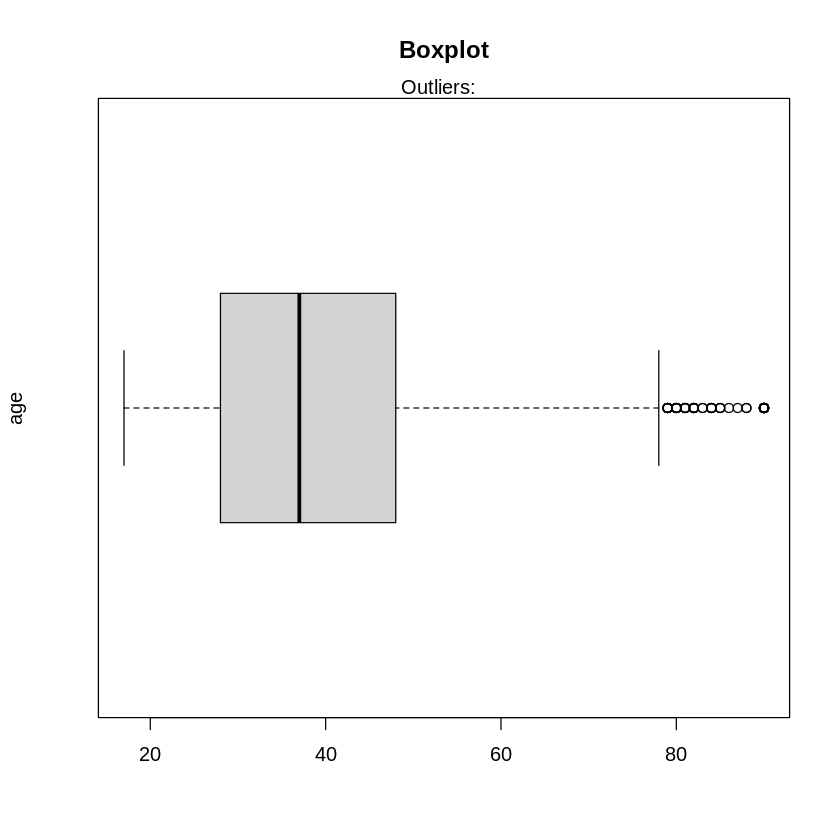

In [88]:
#Boxplot for outliers of age.

boxplot(Adult_trainingDF$age,ylab = "age",main = "Boxplot",horizontal = TRUE)
mtext(paste("Outliers: ", paste(collapse = ", ")))

### Outliers from 80 can be seen from the above plot

## Finding positions of outliers

In [89]:
#printing total outlier_age 

outlier_age<- which(Adult_trainingDF$age>80)
outlier_age

[1]   100   493   553   886  1067  1486  2421  2468  2878  3454  3869  3892
[13]  4115  4681  5155  5482  5937  5962  6477  7148  7255  7652  8406  8609
[25]  8769  8774  8786  8922  9370  9398  9562  9858 10159 10283 10469 10471
[37] 10992 11092 11109 11235 11563 12657 12949 13456 14092 14282 14472 14661
[49] 14747 14767

In [90]:
# Outilers of age
Adult_trainingDF[outlier_age, "age"]

age
<dbl>
90
90
88
90
90
82
90
90
90


In [91]:
# summary of Adult_training $age
summary(Adult_trainingDF$age)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  17.00   28.00   37.00   38.69   48.00   90.00 

## Identifying lower and upper limit outliers

In [92]:
# finding upper and lower bound of age
Q1 <- quantile(Adult_trainingDF$age,0.25)
Q3 <- quantile(Adult_trainingDF$age,0.75)
IQR <- Q3-Q1
lower_bound <- Adult_trainingDF$age[Adult_trainingDF$age<(Q1-(1.5 * IQR))]
upper_bound <- Adult_trainingDF$age[Adult_trainingDF$age>(Q3+(1.5 * IQR))]

In [93]:
#outlier for lower bound

lower_bound

numeric(0)

In [94]:
#outliers for upper bound

upper_bound

[1] 79 90 80 90 88 90 90 82 79 90 80 90 79 79 90 83 85 82 80 90 80 90 84 90 90
[26] 84 80 90 79 84 90 79 81 80 79 80 90 80 90 83 82 90 90 82 85 81 79 81 90 82
[51] 88 84 86 90 82 81 79 90 80 79 84 90 81 90 87 80 82 90 85 82

In [95]:
#extreme outlier in age

max(upper_bound)

[1] 90

## In education, there are no outliers lower bound and several outliers in the upper bound. and the most extreme educational outlier is 90.

# Density ploting for age

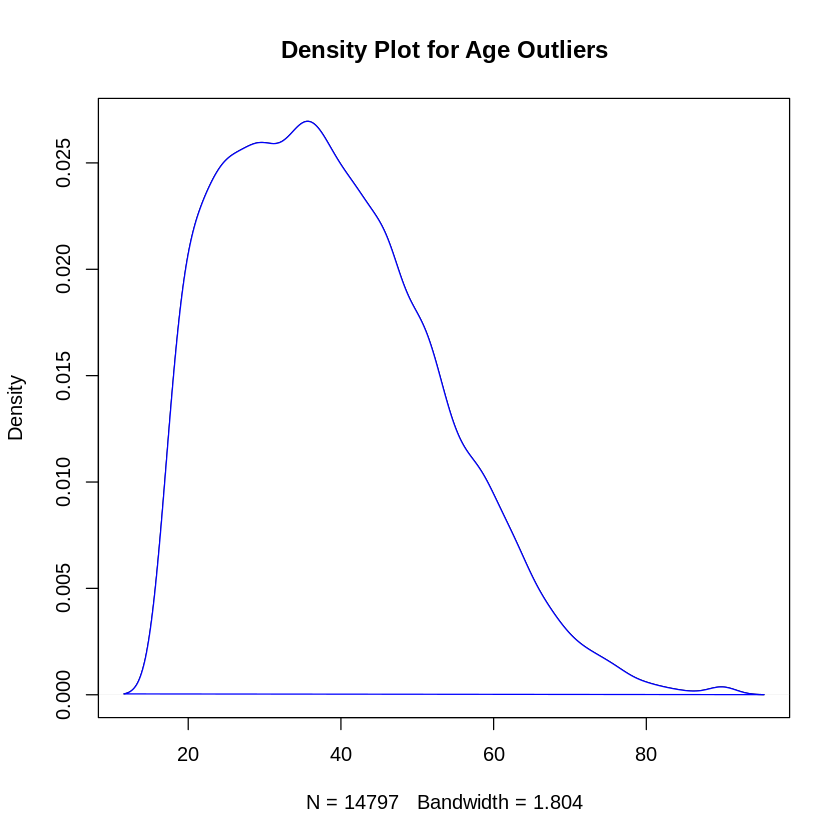

In [96]:
#Ploting Density of outiliers for age

par(mfrow=c(1,1))
Age <- density(Adult_trainingDF$age) 

# plots the results
plot(Age, main="Density Plot for Age Outliers") 

# plots the results (filled)
polygon(Age, col="white", border="blue") 

### We can observe from the density plot outlier graph above that there are few outliers in the 80-90 range. The majority of the data falls between the ages of 20 and 60.

# Creating new data frame

In [97]:
#creating dataframe for adultover80DF

adultabove80DF<- subset(Adult_trainingDF,age>80)

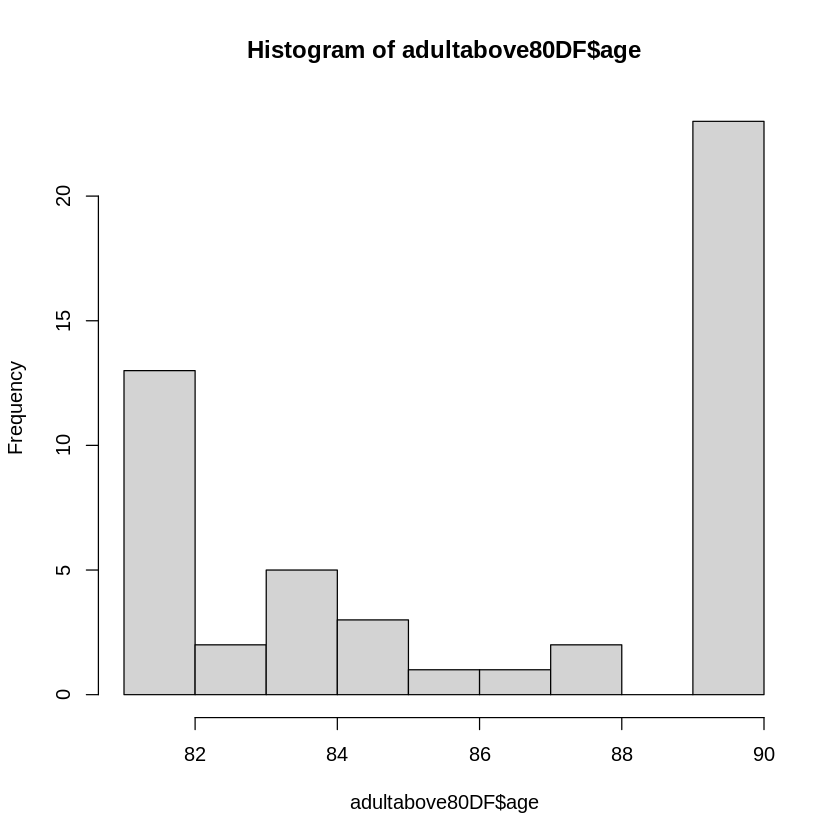

In [98]:
#Plotting histogram for Age
hist(adultabove80DF$age)

## From the above histogram we can see the data lies from 80 to 90. age 90 have the highest range around 20 and least ranage of age 87. 

# Summary

*  We can observe that there are more men and females in the private sector by looking at the bar plot of the contingency table of 'workclass' and'sex'.
*  We can observe that the number of men in the marital status of 'Married-civ-spouse' is larger than the number of females in the marital status of 'Never married' by looking at the bar plot of the contingency table of'sex' and'marital status.'
* In education, there are several outliers in the lower bound and none in the upper bound. and the most extreme educational outlier is 1.
* From the density plot outlier graph of age we can observe  that there are few outliers in the 80-90 range. The majority of the data falls between the ages of 20 and 60.
* age above 80 histogram we can see that the data ranges from 80 to 90. The highest range is roughly 20, while the lowest range is around 80 years old.

